In [1]:
import category_encoders as ce
from category_encoders.wrapper import PolynomialWrapper
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, make_scorer
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, MultiLabelBinarizer
from imblearn.over_sampling import SMOTE, SMOTEN, SMOTENC
from sklearn.preprocessing import LabelEncoder, normalize
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import f1_score, classification_report, confusion_matrix, plot_confusion_matrix, jaccard_score, accuracy_score, hamming_loss
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import Pipeline

from imblearn.ensemble import EasyEnsembleClassifier, BalancedBaggingClassifier, BalancedRandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.multioutput import ClassifierChain

from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.multiclass import OneVsOneClassifier

from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN
from skmultilearn.ensemble import RakelD, LabelSpacePartitioningClassifier
from skmultilearn.model_selection.measures import get_combination_wise_output_matrix
from collections import Counter
from skmultilearn.model_selection import iterative_train_test_split
from skmultilearn.ext import download_meka, Meka

import statistics
from zipfile import BadZipFile

In [2]:
meka_classpath = download_meka()

MEKA 1.9.2 found, not downloading


In [3]:
meka_classpath

'C:\\Users\\Nico\\scikit_ml_learn_data\\meka\\meka-release-1.9.2\\lib\\'

In [4]:
df = pd.read_excel('FINAL_FINAL 2.xlsx', index_col='Primary Key')

In [5]:
df.columns

Index(['Created', 'Mileage In', 'Work Order', 'Model', 'Line Type',
       'Service Category', 'Service Package', 'Description', 'Definition',
       'Price', 'Quantity', 'Total', 'Discount', 'Net Total', 'ContactID',
       'ServiceItemID', 'InvoiceID', 'Make', 'Year', 'labels', 'is_same_label',
       'body type'],
      dtype='object')

In [6]:
df2 = df[['Mileage In', 'Make', 'Model', 'Year', 'Service Category']]

In [7]:
X = df2[['Make', 'Year','Model', 'Mileage In']]

In [8]:
Y = df2['Service Category']

In [9]:
# instantiate encoder

encoder = ce.count.CountEncoder(cols=['Make', 'Year', 'Model'])

In [10]:
# encoder = PolynomialWrapper(encoder)

In [11]:
encoder.fit(X, Y)

C:\Users\Nico\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


CountEncoder(cols=['Make', 'Year', 'Model'], combine_min_nan_groups=True)

In [12]:
# encode features

X_encoded = encoder.transform(X)

In [13]:
X_encoded.describe()

,Make,Year,Model,Mileage In
count,30585.000000,30585.000000,30585.000000,3.058500e+04
mean,5783.878143,2491.103973,1204.914141,7.776626e+04
std,3934.406442,1197.734534,1324.951151,7.057198e+04
min,10.000000,18.000000,1.000000,0.000000e+00
25%,2748.000000,1464.000000,265.000000,3.940500e+04
50%,4944.000000,2719.000000,616.000000,6.435900e+04
75%,10820.000000,3898.000000,1716.000000,1.013470e+05
max,10820.000000,4061.000000,4217.000000,3.021518e+06


In [14]:
df2 = pd.concat([X_encoded, Y], axis=1)

In [15]:
df2.describe()

,Make,Year,Model,Mileage In
count,30585.000000,30585.000000,30585.000000,3.058500e+04
mean,5783.878143,2491.103973,1204.914141,7.776626e+04
std,3934.406442,1197.734534,1324.951151,7.057198e+04
min,10.000000,18.000000,1.000000,0.000000e+00
25%,2748.000000,1464.000000,265.000000,3.940500e+04
50%,4944.000000,2719.000000,616.000000,6.435900e+04
75%,10820.000000,3898.000000,1716.000000,1.013470e+05
max,10820.000000,4061.000000,4217.000000,3.021518e+06


In [16]:
df2

,Make,Year,Model,Mileage In,Service Category
Primary Key,,,,,
17,2748,2009,246,68624,Engine
18,2748,2009,246,68624,Engine
19,2748,2009,246,68624,Engine
20,2748,2009,246,68624,Engine
21,2748,2009,246,68624,Engine
...,...,...,...,...,...
43003,10820,436,685,24616,Change Oil
43004,10820,436,685,24616,Change Oil
43005,10820,436,685,24616,Change Oil


In [17]:
df3 = df2.groupby(list(X_encoded.columns)).agg(list)

In [18]:
df3

Service Category
Make  Year Model Mileage In                                                   
10    2009 1     89156                           [Complete Vehicle Inspection]
      2767 9     48479       [Change Oil, Change Oil, Change Oil, Change Oi...
13    713  13    17028       [Engine Oil / Oil Filter, Minor Preventive Mai...
18    2009 18    25889       [Minor Preventive Maintenance Service, Minor P...
                 85889       [HVAC (Heating, Ventilation & Air Conditioning...
...                                                                        ...
10820 4061 4217  170588                          [Complete Vehicle Inspection]
                 170894                                       [Engine, Engine]
                 185270      [Brakes, Minor Preventive Maintenance Service,...
                 188430                                       [Engine, Engine]
                 404550                                            [Batteries]

[4986 rows x 1 columns]

In [19]:
df3 = df3.reset_index()

In [20]:
df3['Service Category'] = df3['Service Category'].apply(np.unique)

In [21]:
mlb = MultiLabelBinarizer()

In [22]:
df4 = df3.join(pd.DataFrame(mlb.fit_transform(df3.pop('Service Category')),
                          columns=mlb.classes_,
                          index=df3.index))

In [23]:
X = df4[list(X_encoded.columns)]

In [24]:
Y = df4.iloc[:,-17:]

In [25]:
Counter(combination for row in get_combination_wise_output_matrix(Y.to_numpy(), order=2) for combination in row)

Counter({(4, 4): 1111,
         (3, 3): 791,
         (5, 10): 90,
         (2, 2): 2054,
         (2, 5): 116,
         (2, 11): 614,
         (11, 14): 390,
         (11, 11): 665,
         (2, 8): 279,
         (2, 14): 1164,
         (8, 11): 130,
         (8, 8): 508,
         (8, 14): 145,
         (10, 11): 549,
         (10, 14): 1053,
         (2, 10): 1466,
         (5, 5): 291,
         (5, 11): 59,
         (14, 14): 1181,
         (5, 8): 39,
         (5, 14): 86,
         (8, 10): 210,
         (10, 10): 1487,
         (12, 12): 322,
         (9, 13): 26,
         (4, 13): 46,
         (9, 9): 304,
         (4, 9): 72,
         (13, 13): 444,
         (7, 7): 358,
         (15, 15): 263,
         (0, 0): 216,
         (0, 10): 68,
         (0, 2): 93,
         (0, 14): 72,
         (0, 12): 16,
         (2, 12): 131,
         (3, 4): 52,
         (3, 7): 28,
         (1, 1): 143,
         (1, 4): 11,
         (1, 7): 4,
         (1, 3): 3,
         (4, 7): 65,
         (4

In [26]:
X_train, Y_train, X_test, Y_test = iterative_train_test_split(X.to_numpy(), Y.to_numpy(), test_size = 0.2)

In [27]:
split = pd.DataFrame({
    'train': Counter(str(combination) for row in get_combination_wise_output_matrix(Y_train, order=2) for combination in row),
    'test' : Counter(str(combination) for row in get_combination_wise_output_matrix(Y_test, order=2) for combination in row)
}).T.fillna(0.0)

split

,"(4, 4)","(3, 3)","(5, 10)","(2, 2)","(2, 5)","(2, 11)","(11, 14)","(11, 11)","(2, 8)","(2, 14)",...,"(3, 13)","(0, 15)","(1, 5)","(1, 15)","(13, 16)","(12, 15)","(13, 15)","(1, 7)","(0, 1)","(1, 6)"
train,889.0,633.0,73.0,1643.0,93.0,491.0,315.0,526.0,223.0,931.0,...,6.0,4.0,3.0,14.0,15.0,2.0,3.0,3.0,2.0,1.0
test,222.0,158.0,17.0,411.0,23.0,123.0,75.0,139.0,56.0,233.0,...,2.0,1.0,0.0,3.0,4.0,1.0,1.0,1.0,1.0,0.0


In [28]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(4004, 4) (982, 4) (4004, 17) (982, 17)


In [29]:
X_train = pd.DataFrame(X_train ,columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

Y_train = pd.DataFrame(Y_train, columns=Y.columns)
Y_test = pd.DataFrame(Y_test, columns=Y.columns)

In [30]:
jaccard = make_scorer(jaccard_score, average='samples')

In [100]:
model = RandomForestClassifier(random_state=13)

In [101]:
cv_score = cross_val_score(model, X_train, Y_train, cv=5, scoring=jaccard)
cv_score.mean()

0.12409489774686404

In [102]:
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=13)

In [103]:
y_pred = model.predict(X_test)

In [104]:
jaccard_score(Y_test, y_pred, average='samples')

0.17994961972581505

In [71]:
meka = Meka(
        meka_classifier = "meka.classifiers.multilabel.BR", # Binary Relevance
        weka_classifier = "weka.classifiers.trees.RandomForest", # with Naive Bayes single-label classifier
        meka_classpath = meka_classpath, #obtained via download_meka
        java_command = 'C:/Program Files (x86)/Java/jre1.8.0_281/bin/java' # path to java executable
)
meka

Meka(java_command='C:/Program Files (x86)/Java/jre1.8.0_281/bin/java',
     meka_classifier='meka.classifiers.multilabel.BR',
     meka_classpath='C:\\Users\\Nico\\scikit_ml_learn_data\\meka\\meka-release-1.9.2\\lib\\',
     weka_classifier='weka.classifiers.trees.RandomForest')

In [72]:
cv_score = cross_val_score(meka, X_train, Y_train, cv=5, scoring=jaccard)
cv_score.mean()

0.2114228225382954

In [73]:
meka.fit(X_train, Y_train)

Meka(java_command='C:/Program Files (x86)/Java/jre1.8.0_281/bin/java',
     meka_classifier='meka.classifiers.multilabel.BR',
     meka_classpath='C:\\Users\\Nico\\scikit_ml_learn_data\\meka\\meka-release-1.9.2\\lib\\',
     weka_classifier='weka.classifiers.trees.RandomForest')

In [74]:
y_pred = meka.predict(X_test)

In [75]:
jaccard_score(Y_test, y_pred, average='samples')

0.2717826058873871

In [61]:
meka = Meka(
        meka_classifier = "meka.classifiers.multilabel.CC", # Binary Relevance
        weka_classifier = "weka.classifiers.trees.RandomForest", # with Naive Bayes single-label classifier
        meka_classpath = meka_classpath, #obtained via download_meka
        java_command = 'C:/Program Files (x86)/Java/jre1.8.0_281/bin/java' # path to java executable
)
meka

Meka(java_command='C:/Program Files (x86)/Java/jre1.8.0_281/bin/java',
     meka_classifier='meka.classifiers.multilabel.CC',
     meka_classpath='C:\\Users\\Nico\\scikit_ml_learn_data\\meka\\meka-release-1.9.2\\lib\\',
     weka_classifier='weka.classifiers.trees.RandomForest')

In [62]:
cv_score = cross_val_score(meka, X_train, Y_train, cv=5, scoring=jaccard)
cv_score.mean()

0.20511373654955117

In [63]:
meka.fit(X_train, Y_train)

Meka(java_command='C:/Program Files (x86)/Java/jre1.8.0_281/bin/java',
     meka_classifier='meka.classifiers.multilabel.CC',
     meka_classpath='C:\\Users\\Nico\\scikit_ml_learn_data\\meka\\meka-release-1.9.2\\lib\\',
     weka_classifier='weka.classifiers.trees.RandomForest')

In [64]:
y_pred = meka.predict(X_test)

In [65]:
jaccard_score(Y_test, y_pred, average='samples')

0.2536283485927433

In [66]:
meka = Meka(
        meka_classifier = "meka.classifiers.multilabel.CT", # Binary Relevance
        weka_classifier = "weka.classifiers.trees.RandomForest", # with Naive Bayes single-label classifier
        meka_classpath = meka_classpath, #obtained via download_meka
        java_command = 'C:/Program Files (x86)/Java/jre1.8.0_281/bin/java' # path to java executable
)
meka

Meka(java_command='C:/Program Files (x86)/Java/jre1.8.0_281/bin/java',
     meka_classifier='meka.classifiers.multilabel.CT',
     meka_classpath='C:\\Users\\Nico\\scikit_ml_learn_data\\meka\\meka-release-1.9.2\\lib\\',
     weka_classifier='weka.classifiers.trees.RandomForest')

In [67]:
cv_score = cross_val_score(meka, X_train, Y_train, cv=5, scoring=jaccard)
cv_score.mean()

0.14697472752313576

In [68]:
meka.fit(X_train, Y_train)

Meka(java_command='C:/Program Files (x86)/Java/jre1.8.0_281/bin/java',
     meka_classifier='meka.classifiers.multilabel.CT',
     meka_classpath='C:\\Users\\Nico\\scikit_ml_learn_data\\meka\\meka-release-1.9.2\\lib\\',
     weka_classifier='weka.classifiers.trees.RandomForest')

In [69]:
y_pred = meka.predict(X_test)

In [70]:
jaccard_score(Y_test, y_pred, average='samples')

0.20182870706777115

In [106]:
meka = Meka(
        meka_classifier = "meka.classifiers.multilabel.meta.BaggingML -I 10 -P 100", # Binary Relevance
#         weka_classifier = "weka.classifiers.bayes.NaiveBayesMultinomial",
        meka_classpath = meka_classpath, #obtained via download_meka
        java_command = 'C:/Program Files (x86)/Java/jre1.8.0_281/bin/java' # path to java executable
)
meka

Meka(java_command='C:/Program Files (x86)/Java/jre1.8.0_281/bin/java',
     meka_classifier='meka.classifiers.multilabel.meta.BaggingML -I 10 -P 100',
     meka_classpath='C:\\Users\\Nico\\scikit_ml_learn_data\\meka\\meka-release-1.9.2\\lib\\')

In [111]:
cv_score = cross_val_score(meka, X_train, Y_train, cv=5, scoring=jaccard)
cv_score.mean()

0.24540418041436296

In [108]:
meka.fit(X_train, Y_train)

Meka(java_command='C:/Program Files (x86)/Java/jre1.8.0_281/bin/java',
     meka_classifier='meka.classifiers.multilabel.meta.BaggingML -I 10 -P 100',
     meka_classpath='C:\\Users\\Nico\\scikit_ml_learn_data\\meka\\meka-release-1.9.2\\lib\\')

In [109]:
y_pred = meka.predict(X_test)

In [110]:
jaccard_score(Y_test, y_pred, average='samples')

0.2848359465737515

In [150]:
meka = Meka(
        meka_classifier = "meka.classifiers.multilabel.meta.EnsembleML",
#         weka_classifier = "weka.classifiers.trees.RandomForest",
        meka_classpath = meka_classpath, #obtained via download_meka
        java_command = 'C:/Program Files (x86)/Java/jre1.8.0_281/bin/java' # path to java executable
)
meka

Meka(java_command='C:/Program Files (x86)/Java/jre1.8.0_281/bin/java',
     meka_classifier='meka.classifiers.multilabel.meta.EnsembleML',
     meka_classpath='C:\\Users\\Nico\\scikit_ml_learn_data\\meka\\meka-release-1.9.2\\lib\\')

In [155]:
cv_score = cross_val_score(meka, np.matrix(X_train), np.matrix(Y_train), cv=5, scoring=jaccard)
cv_score.mean()

0.24192546492209416

In [152]:
meka.fit(np.matrix(X_train), np.matrix(Y_train))

Meka(java_command='C:/Program Files (x86)/Java/jre1.8.0_281/bin/java',
     meka_classifier='meka.classifiers.multilabel.meta.EnsembleML',
     meka_classpath='C:\\Users\\Nico\\scikit_ml_learn_data\\meka\\meka-release-1.9.2\\lib\\')

In [153]:
y_pred = meka.predict(np.matrix(X_test))

In [154]:
jaccard_score(Y_test, y_pred, average='samples')

0.26070339721254354

In [89]:
meka = Meka(
        meka_classifier = "meka.classifiers.multilabel.meta.RandomSubspaceML -I 10 -P 60 -A 50",
#         weka_classifier = "weka.classifiers.trees.RandomForest",
        meka_classpath = meka_classpath, #obtained via download_meka
        java_command = 'C:/Program Files (x86)/Java/jre1.8.0_281/bin/java' # path to java executable
)
meka

Meka(java_command='C:/Program Files (x86)/Java/jre1.8.0_281/bin/java',
     meka_classifier='meka.classifiers.multilabel.meta.RandomSubspaceML -I 10 '
                     '-P 60 -A 50',
     meka_classpath='C:\\Users\\Nico\\scikit_ml_learn_data\\meka\\meka-release-1.9.2\\lib\\',
     weka_classifier='weka.classifiers.trees.RandomForest')

In [90]:
# cv_score = cross_val_score(meka, np.matrix(X_train), np.matrix(Y_train), cv=5, scoring=jaccard)
# cv_score.mean()

In [91]:
meka.fit(np.matrix(X_train), np.matrix(Y_train))

Exception: 

Evaluation Options:

-h
	Output help information.
-t <name of training file>
	Sets training file.
-T <name of test file>
	Sets test file (will be used for making predictions).
-predictions <name of output file for predictions>
	Sets the file to store the predictions in (does not work with cross-validation).
-x <number of folds>
	Do cross-validation with this many folds.
-no-eval
	Skips evaluation, e.g., used when test set contains no class labels.
-R
	Randomize the order of instances in the dataset.
-split-percentage <percentage>
	Sets the percentage for the train/test set split, e.g., 66.
-split-number <number>
	Sets the number of training examples, e.g., 800
-i
	Invert the specified train/test split.
-s <random number seed>
	Sets random number seed (use with -R, for different CV or train/test splits).
-threshold <threshold>
	Sets the type of thresholding; where
		'PCut1' automatically calibrates a threshold (the default);
		'PCutL' automatically calibrates one threshold for each label;
		any number, e.g. '0.5', specifies that threshold.
-C <number of labels>
	Sets the number of target variables (labels) to assume (indexed from the beginning).
-d <classifier_file>
	Specify a file to dump classifier into.
-l <classifier_file>
	Specify a file to load classifier from.
-verbosity <verbosity level>
	Specify more/less evaluation output


Classifier Options:

-A
	Size of attribute space, as a percentage of total attribute space size (must be between 1 and 100, default: 50)
-I
	Sets the number of models (default 10)
-P
	Size of each bag, as a percentage of total training size (default 67)
-S
	Random number seed for sampling (default 1)
-W
	Full name of base classifier.
	(default: meka.classifiers.multilabel.CC)
-output-debug-info
	If set, classifier is run in debug mode and
	may output additional info to the console
--do-not-check-capabilities
	If set, classifier capabilities are not checked before classifier is built
	(use with caution).
-num-decimal-places
	The number of decimal places for the output of numbers in the model (default 2).
-batch-size
	The desired batch size for batch prediction  (default 100).
-

-P
	Size of each bag, as a percentage of the
	training set size. (default 100)
-O
	Calculate the out of bag error.
-store-out-of-bag-predictions
	Whether to store out of bag predictions in internal evaluation object.
-output-out-of-bag-complexity-statistics
	Whether to output complexity-based statistics when out-of-bag evaluation is performed.
-print
	Print the individual classifiers in the output
-attribute-importance
	Compute and output attribute importance (mean impurity decrease method)
-I
	Number of iterations.
	(current value 100)
-num-slots
	Number of execution slots.
	(default 1 - i.e. no parallelism)
	(use 0 to auto-detect number of cores)
-K
	Number of attributes to randomly investigate.	(default 0)
	(<1 = int(log_2(#predictors)+1)).
-M
	Set minimum number of instances per leaf.
	(default 1)
-V
	Set minimum numeric class variance proportion
	of train variance for split (default 1e-3).
-S
	Seed for random number generator.
	(default 1)
-depth
	The maximum depth of the tree, 0 for unlimited.
	(default 0)
-N
	Number of folds for backfitting (default 0, no backfitting).
-U
	Allow unclassified instances.
-B
	Break ties randomly when several attributes look equally good.
-output-debug-info
	If set, classifier is run in debug mode and
	may output additional info to the console
--do-not-check-capabilities
	If set, classifier capabilities are not checked before classifier is built
	(use with caution).
-num-decimal-places
	The number of decimal places for the output of numbers in the model (default 2).
-batch-size
	The desired batch size for batch prediction  (default 100).

Apr 10, 2021 12:44:57 AM com.github.fommil.netlib.ARPACK <clinit>
WARNING: Failed to load implementation from: com.github.fommil.netlib.NativeSystemARPACK
Apr 10, 2021 12:44:57 AM com.github.fommil.jni.JniLoader liberalLoad
INFO: successfully loaded C:\Users\Nico\AppData\Local\Temp\jniloader4378835530977543383netlib-native_ref-win-i686.dll
java.lang.ClassCastException: weka.classifiers.trees.RandomForest cannot be cast to meka.classifiers.multilabel.ProblemTransformationMethod
	at meka.classifiers.multilabel.meta.RandomSubspaceML.buildClassifier(RandomSubspaceML.java:63)
	at meka.classifiers.multilabel.Evaluation.runExperiment(Evaluation.java:229)
	at meka.classifiers.multilabel.ProblemTransformationMethod.runClassifier(ProblemTransformationMethod.java:172)
	at meka.classifiers.multilabel.ProblemTransformationMethod.evaluation(ProblemTransformationMethod.java:152)
	at meka.classifiers.multilabel.meta.RandomSubspaceML.main(RandomSubspaceML.java:157)


In [86]:
y_pred = meka.predict(np.matrix(X_test))

IndexError: list index out of range

In [82]:
jaccard_score(Y_test, y_pred, average='samples')

0.20823756182717484

In [105]:
classifier = LabelPowerset(RandomForestClassifier(random_state=13))

In [106]:
cv_score = cross_val_score(classifier, X_train, Y_train, cv=5, scoring=jaccard)
cv_score.mean()

0.19768287767770445

In [107]:
classifier.fit(X_train, Y_train)

LabelPowerset(classifier=RandomForestClassifier(random_state=13),
              require_dense=[True, True])

In [108]:
y_pred = classifier.predict(X_test)

In [109]:
jaccard_score(Y_test, y_pred, average='samples')

0.2705953592016664

In [110]:
classifier = MLkNN(k=1)

In [111]:
cv_score = cross_val_score(classifier, X_train.to_numpy(), Y_train.to_numpy(), cv=5, scoring=jaccard)
cv_score.mean()

C:\Users\Nico\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\Nico\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\Nico\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\Nico\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From ver

0.1708881536967679

In [112]:
classifier.fit(X_train.to_numpy(), Y_train.to_numpy())

C:\Users\Nico\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


MLkNN(k=1)

In [113]:
y_pred = classifier.predict(X_test.to_numpy())

In [114]:
jaccard_score(Y_test, y_pred, average='samples')

0.19058881945453662

In [115]:
classifier = RakelD(
    base_classifier=RandomForestClassifier(random_state=13),
    base_classifier_require_dense=[True, True],
    labelset_size=3
)

In [116]:
cv_score = cross_val_score(classifier, X_train, Y_train, cv=5, scoring=jaccard)
cv_score.mean()

C:\Users\Nico\anaconda3\lib\site-packages\skmultilearn\cluster\random.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(label_sets)
C:\Users\Nico\anaconda3\lib\site-packages\skmultilearn\cluster\random.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(label_sets)
C:\Users\Nico\anaconda3\lib\site-packages\skmultilearn\cluster\random.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprec

0.14131372837524522

In [117]:
classifier.fit(X_train.to_numpy(), Y_train.to_numpy())

C:\Users\Nico\anaconda3\lib\site-packages\skmultilearn\cluster\random.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(label_sets)


LabelSpacePartitioningClassifier(classifier=LabelPowerset(classifier=RandomForestClassifier(random_state=13),
                                                          require_dense=[True,
                                                                         True]),
                                 clusterer=RandomLabelSpaceClusterer(allow_overlap=False,
                                                                     cluster_count=6,
                                                                     cluster_size=3),
                                 require_dense=[False, False])

In [118]:
y_pred = classifier.predict(X_test.to_numpy())

In [119]:
jaccard_score(Y_test, y_pred, average='samples')

0.22735552003100323

In [763]:
model = KNeighborsClassifier(n_neighbors=1)

In [764]:
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [765]:
y_pred = model.predict(X_test)

In [766]:
jaccard_score(Y_test, y_pred, average='samples')

0.22734180002936424

In [767]:
base_rf = RandomForestClassifier(random_state=13)

In [768]:
ovr = OneVsRestClassifier(base_rf)

In [769]:
ovr.fit(X_train, Y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(random_state=13))

In [770]:
Y_pred_ovr = ovr.predict(X_test)

In [771]:
ovr_jaccard_score = jaccard_score(Y_test, Y_pred_ovr, average='samples')
ovr_jaccard_score

0.21490481084520138

In [624]:
# Fit an ensemble of RF classifier chains and take the
# take the average prediction of all the chains.
chains = [ClassifierChain(base_rf, order='random', random_state=i) for i in range(10)]

In [625]:
for chain in chains:
    chain.fit(X_train, Y_train)

In [626]:
Y_pred_chains = np.array([chain.predict(X_test) for chain in chains])

In [627]:
chain_jaccard_scores = [jaccard_score(Y_test, Y_pred_chain >= .5,
                                      average='samples')
                        for Y_pred_chain in Y_pred_chains]

In [628]:
Y_pred_ensemble = Y_pred_chains.mean(axis=0)
ensemble_jaccard_score = jaccard_score(Y_test,
                                       Y_pred_ensemble >= .5,
                                       average='samples')

In [629]:
model_scores = [ovr_jaccard_score] + chain_jaccard_scores
model_scores.append(ensemble_jaccard_score)

In [630]:
model_names = ('Independent',
               'Chain 1',
               'Chain 2',
               'Chain 3',
               'Chain 4',
               'Chain 5',
               'Chain 6',
               'Chain 7',
               'Chain 8',
               'Chain 9',
               'Chain 10',
               'Ensemble')

In [631]:
x_pos = np.arange(len(model_names))

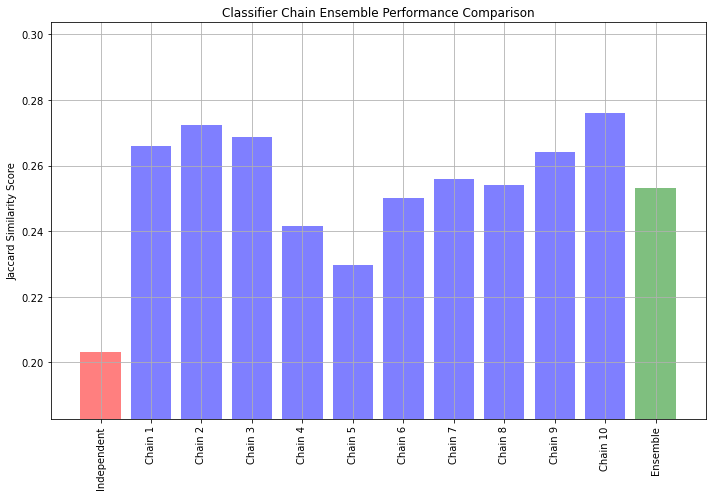

In [632]:
# Plot the Jaccard similarity scores for the independent model, each of the
# chains, and the ensemble (note that the vertical axis on this plot does
# not begin at 0).

fig, ax = plt.subplots(figsize=(10, 7))
ax.grid(True)
ax.set_title('Classifier Chain Ensemble Performance Comparison')
ax.set_xticks(x_pos)
ax.set_xticklabels(model_names, rotation='vertical')
ax.set_ylabel('Jaccard Similarity Score')
ax.set_ylim([min(model_scores) * .9, max(model_scores) * 1.1])
colors = ['r'] + ['b'] * len(chain_jaccard_scores) + ['g']
ax.bar(x_pos, model_scores, alpha=0.5, color=colors)
plt.tight_layout()
plt.show()

In [359]:
# X_test_encoded[ (X_test_encoded['Make_0']==0) & \
#               (X_test_encoded['Make_1']==0) & \
#               (X_test_encoded['Make_2']==0) & \
#               (X_test_encoded['Make_3']==0) & \
#               (X_test_encoded['Make_4']==0) & \
#               (X_test_encoded['Make_5']==0) ].index

Int64Index([], dtype='int64')

In [360]:
# X_train_encoded[ (X_train_encoded['Make_0']==0) & \
#               (X_train_encoded['Make_1']==0) & \
#               (X_train_encoded['Make_2']==0) & \
#               (X_train_encoded['Make_3']==0) & \
#               (X_train_encoded['Make_4']==0) & \
#               (X_train_encoded['Make_5']==0) ].index

Int64Index([], dtype='int64')

In [361]:
# X_test_encoded[ (X_test_encoded['Year_0']==0) & \
#               (X_test_encoded['Year_1']==0) & \
#               (X_test_encoded['Year_2']==0) & \
#               (X_test_encoded['Year_3']==0) & \
#               (X_test_encoded['Year_4']==0) & \
#               (X_test_encoded['Year_5']==0) ].index

Int64Index([], dtype='int64')

In [362]:
# X_train_encoded[ (X_train_encoded['Year_0']==0) & \
#               (X_train_encoded['Year_1']==0) & \
#               (X_train_encoded['Year_2']==0) & \
#               (X_train_encoded['Year_3']==0) & \
#               (X_train_encoded['Year_4']==0) & \
#               (X_train_encoded['Year_5']==0) ].index

Int64Index([], dtype='int64')

In [363]:
# X_test_encoded[ (X_test_encoded['Model_0']==0) & \
#               (X_test_encoded['Model_1']==0) & \
#               (X_test_encoded['Model_2']==0) & \
#               (X_test_encoded['Model_3']==0) & \
#               (X_test_encoded['Model_4']==0) & \
#               (X_test_encoded['Model_5']==0) & \
#                 (X_test_encoded['Model_6']==0) & \
#                (X_test_encoded['Model_7']==0) & \
#               (X_test_encoded['Model_8']==0) ].index

Int64Index([29, 91, 146, 147, 243, 326, 374, 588], dtype='int64')

In [364]:
# X_train_encoded[ (X_train_encoded['Model_0']==0) & \
#               (X_train_encoded['Model_1']==0) & \
#               (X_train_encoded['Model_2']==0) & \
#               (X_train_encoded['Model_3']==0) & \
#               (X_train_encoded['Model_4']==0) & \
#               (X_train_encoded['Model_5']==0) & \
#                 (X_train_encoded['Model_6']==0) & \
#                (X_train_encoded['Model_7']==0) & \
#               (X_train_encoded['Model_8']==0) ].index

Int64Index([], dtype='int64')